# Minor Project
# Internship Roll No.- 23368
# Enr No. - 11601172022
# Name - Shatakshi Bansal
# Branch - CSE-AI
# Date of Submission - 2nd July 2023

# 39. Global Air Pollution
#### Air Pollution is contamination of the indoor or outdoor environment by any chemical, physical or biological agent that modifies the natural characteristics of the atmosphere. Pollutants of major public health concern include particulate matter, carbon monoxide, ozone, nitrogen dioxide and sulfur dioxide. Outdoor and indoor air pollution cause respiratory and other diseases .
#### Dataset : https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

# Exploratory Data Analysis

### QUESTION 1
###### Show if there are any columns with missing values with their count.

In [3]:
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

Country    427
City         1
dtype: int64


######  Here, we can see that City and Country has some missing values.

### QUESTION 2
###### Plot the distplot of 'AQI Value' vs 'AQI Category'.(kind-'kde')

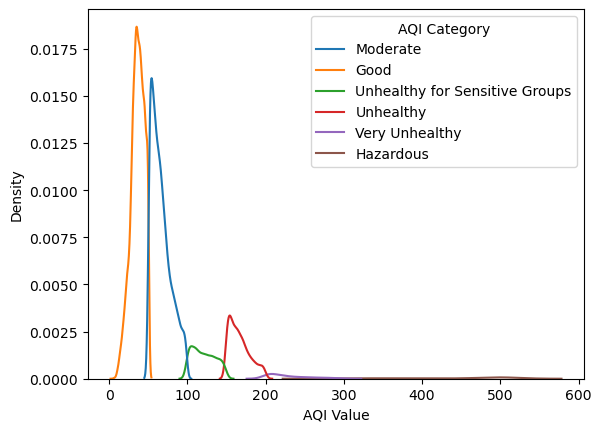

In [4]:
sns.kdeplot(data = df, x = 'AQI Value', hue = 'AQI Category')
plt.show()

###### Maximum density has an AQI value below hundred which is categorised as Moderate.

### QUESTION 3
###### Plot a stacked bar graph of 'Ozone AQI Value' vs 'AQI Category'.


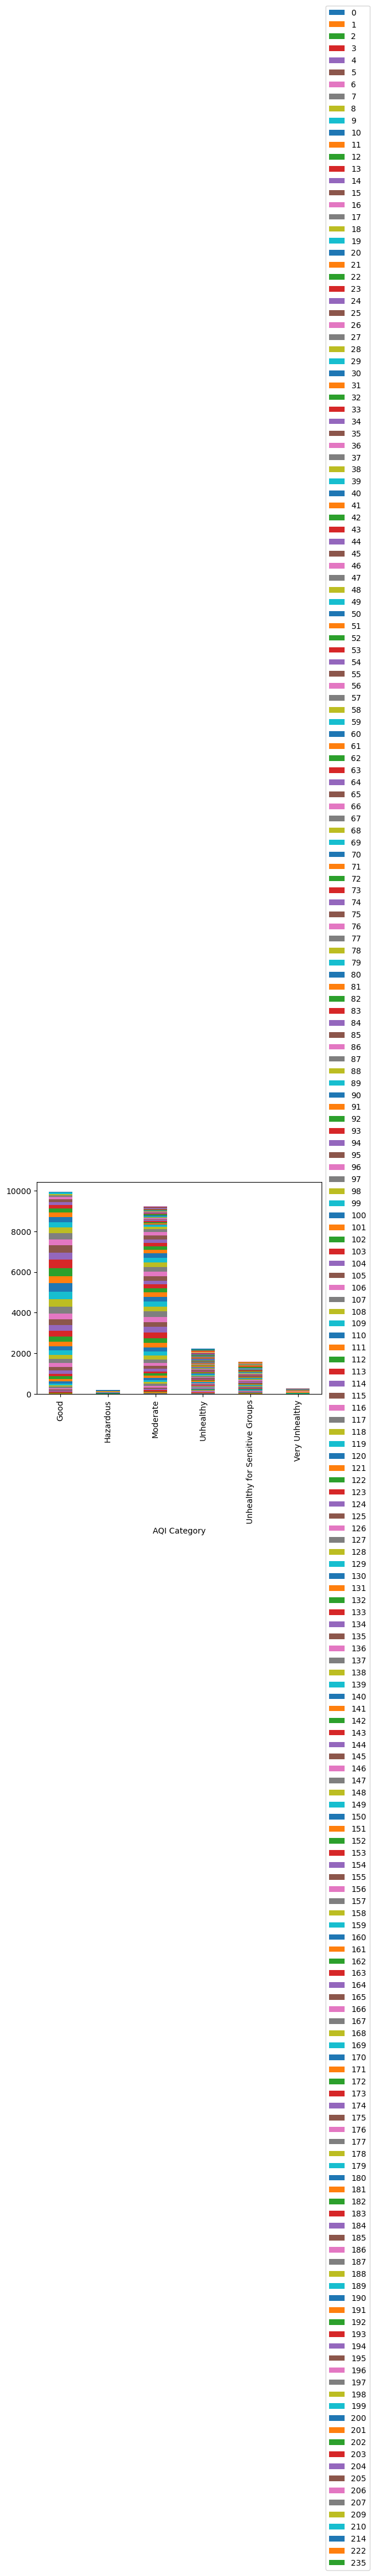

In [5]:
grouped_data = df.groupby(['AQI Category', 'Ozone AQI Value']).size().unstack()
grouped_data.plot(kind = 'bar', stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### QUESTION 4
###### Show the list of cities without a stated country. Fill the missing columns with 'Unknown'.

In [6]:
missing_cities = df[df['Country'].isnull()]['City']
print(missing_cities)
df['Country'].fillna('Unknown', inplace = True)

535               Granville
654      Kingston Upon Hull
787           New Waterford
801               Kingstown
906                Nanakuli
                ...        
22979             Kyaikkami
23115                  Bima
23311             Marapanim
23345               Calbuco
23420            Sungairaya
Name: City, Length: 427, dtype: object


###### The missing city names here have been filled with the value "Unknown"

### QUESTION 5
###### Plot the most represented countries in this dataset using a horizontal bar graph.

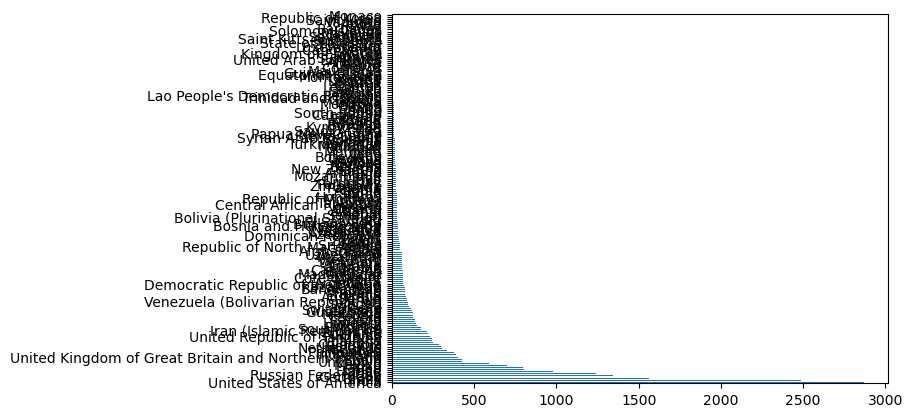

In [7]:
country_count = df['Country'].value_counts()
country_count.plot(kind = 'barh')
plt.show()


###### We can see that USA is the most represented country

# Extension of EDA Task - Classification/Regression

###### Data Preprocessing 
###### Feature Engineering
###### Split dataset in train-test (80:20 ratio)
###### Model selection
###### Model training
###### Model evaluation
###### Fine-tune the Model
###### Make predictions

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("dataset.csv")

# Preprocessing
X = df.drop(['PM2.5 AQI Value'], axis=1) 
y = df['PM2.5 AQI Value'] 

categorical_columns = X.select_dtypes(include=['object']).columns
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

# Split dataset in train-test (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model selection
model = RandomForestRegressor()

# Model training
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [9]:
print("Mean Squared Error: ", mse)

Mean Squared Error:  20.7930535478372


In [10]:
print(y_pred)

[ 58.    21.89  47.   ... 161.    57.    30.  ]
